# Upload required Libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as pyo
from plotly import tools
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
print("No of datapoints for application records : {}".format(len(data)))
print("No. of unique clients in dataset : {}".format(len(data.ID.unique())))

No of datapoints for application records : 438557
No. of unique clients in dataset : 438510


In [4]:
records = pd.read_csv('credit_record.csv')
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
print("No of datapoints for credit records : {}".format(len(records)))
print("No. of unique clients in dataset : {}".format(len(records.ID.unique())))

No of datapoints for credit records : 1048575
No. of unique clients in dataset : 45985


In [6]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

In [7]:
print(f'Duplicates in applications data : {data.iloc[:,1:].duplicated().sum()},({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')

Duplicates in applications data : 348472,(79.5%)


In [8]:
print(f'Duplicates in records data: {records.duplicated().sum()},({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in records data: 0,(0.0%)


# Drop duplicates

In [9]:
data = data.drop_duplicates(subset=data.columns[1:], keep='first')

In [10]:
data.shape

(90085, 18)

In [11]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

In [12]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

In [13]:
unique_counts

,Column_name,Num_unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
3,FLAG_OWN_REALTY,2
2,FLAG_OWN_CAR,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
15,FLAG_EMAIL,2
7,NAME_EDUCATION_TYPE,5
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5


In [14]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                                         columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

In [15]:
unique_counts

,Column_name,Num_unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [16]:
data.drop(['FLAG_MOBIL'], axis=1, inplace=True)

In [17]:
data.shape

(90085, 17)

# Handling missing values

In [18]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [19]:
import missingno as msno

Text(0.5, 1.0, 'Missing Data for application records dataset')

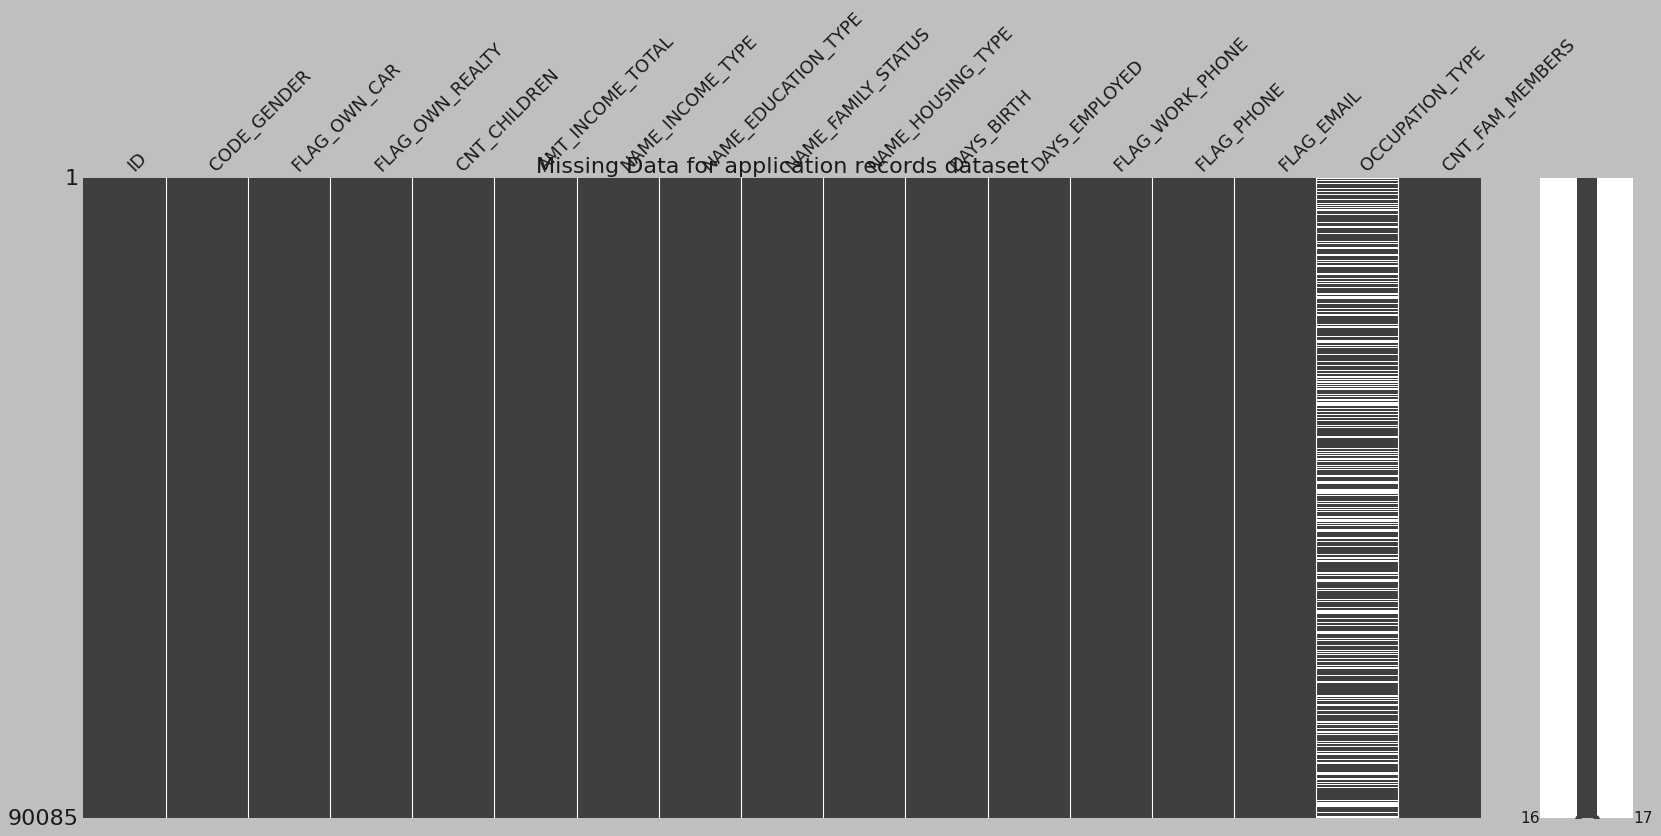

In [20]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset", fontsize=20)

In [21]:
data['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

Text(0.5, 1.0, 'Missing Data for application records dataset')

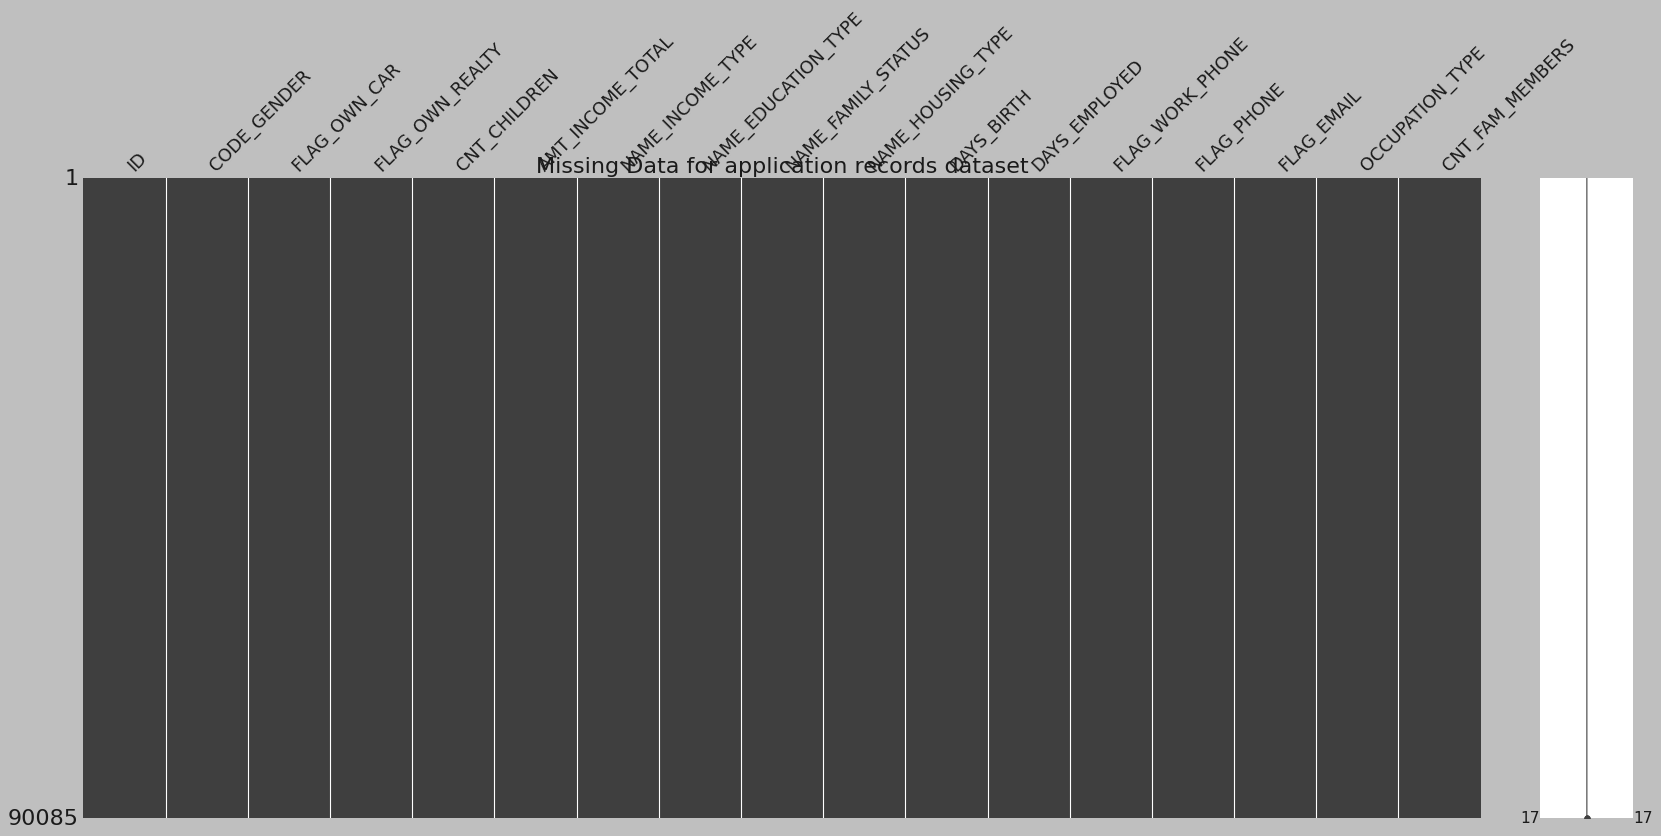

In [22]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset", fontsize=20)

In [23]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Text(0.5, 1.0, 'Missing Data for credit records dataset')

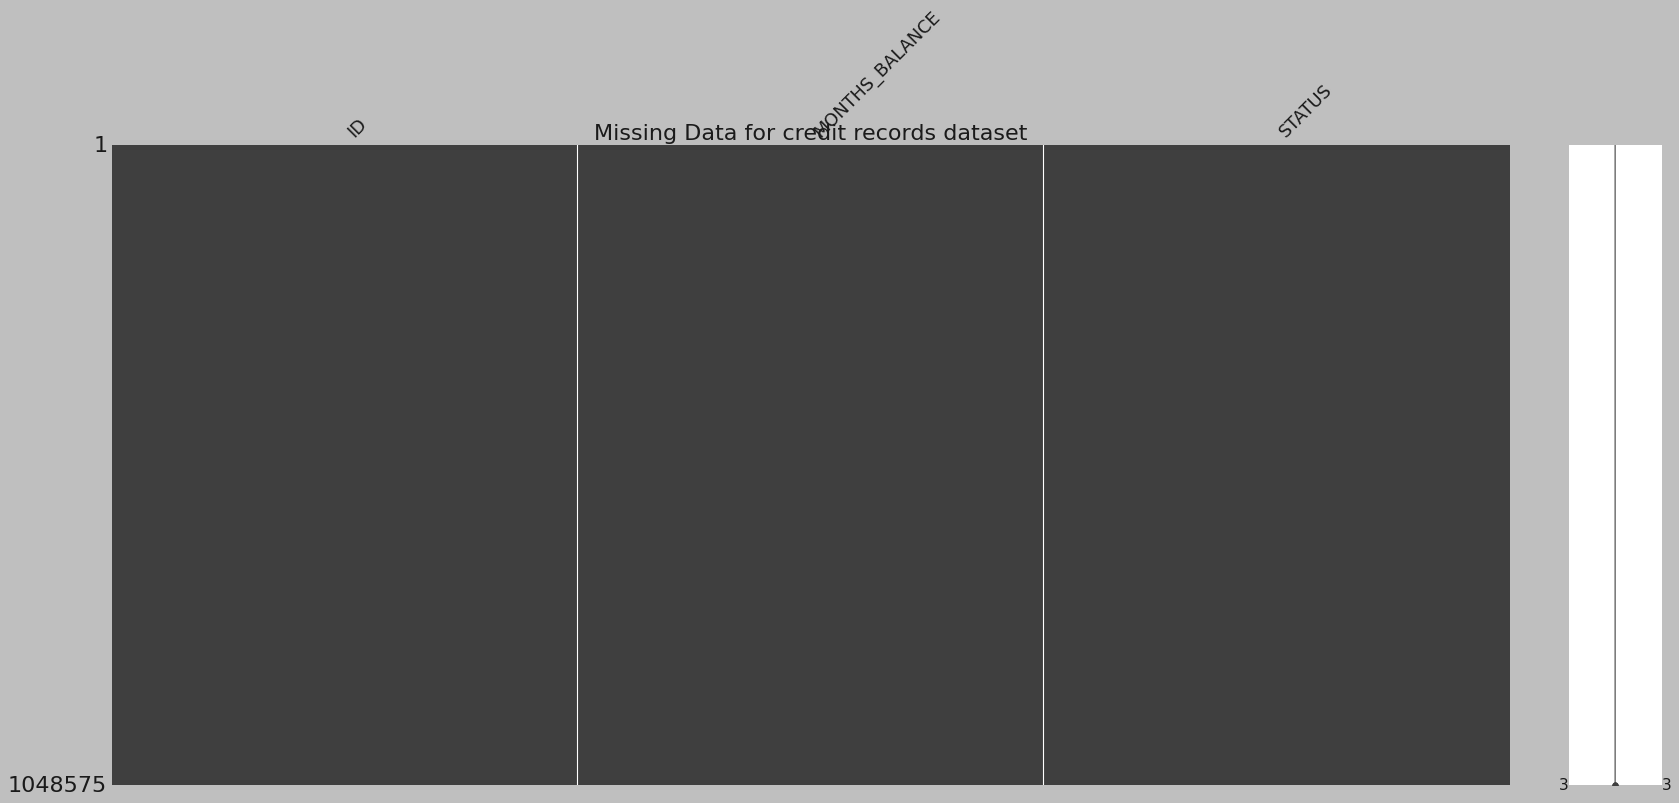

In [24]:
missing2 = msno.matrix(records)
missing2.set_title("Missing Data for credit records dataset", fontsize=20)

# Converting data in a proper format

In [25]:
records['target'] = records['STATUS']
records['target'].replace('X',0, inplace=True)
records['target'].replace('C',0, inplace=True)
records['target'] = records['target'].astype(int)
records.loc[records['target']>=1, 'target']=1

In [26]:
records['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [27]:
records

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [28]:
records['target'].value_counts()

target
0    1034381
1      14194
Name: count, dtype: int64

In [29]:
df = pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [30]:
df

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [31]:
df['target'].value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [32]:
new_df = pd.merge(data, df, how='inner', on=['ID'])

In [33]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [34]:
new_df.shape

(9709, 18)

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   object 
 2   FLAG_OWN_CAR         9709 non-null   object 
 3   FLAG_OWN_REALTY      9709 non-null   object 
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   object 
 7   NAME_EDUCATION_TYPE  9709 non-null   object 
 8   NAME_FAMILY_STATUS   9709 non-null   object 
 9   NAME_HOUSING_TYPE    9709 non-null   object 
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   o

In [36]:
new_df['target'].value_counts()

target
0    8426
1    1283
Name: count, dtype: int64

In [37]:
new_df['DAYS_BIRTH']

0      -12005
1      -21474
2      -19110
3      -22464
4      -16872
        ...  
9704   -20600
9705   -15837
9706   -19101
9707   -12387
9708    -9188
Name: DAYS_BIRTH, Length: 9709, dtype: int64

In [38]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'target'],
      dtype='object')

In [39]:
new_df["Age_Years"] = round(-new_df['DAYS_BIRTH']/365,0)

In [40]:
new_df["Age_Years"]

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: Age_Years, Length: 9709, dtype: float64

In [41]:
new_df.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [42]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0


In [43]:
new_df['Unemployed'] = 0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'Unemployed']=1

In [44]:
new_df 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0


In [45]:
new_df["Years_Employed"] = round(-new_df['DAYS_EMPLOYED']/365,0)

In [46]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Years_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1,-1001.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0,2.0


In [47]:
new_df.loc[new_df['Years_Employed']<0,'Years_Employed'] = 0

In [48]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Years_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


In [49]:
new_df.drop("DAYS_EMPLOYED", axis=1, inplace=True)

In [50]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Years_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


In [51]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'target', 'Age_Years', 'Unemployed', 'Years_Employed'],
      dtype='object')

# Renaming the column names

In [52]:
new_df = new_df.rename(columns={'CODE_GENDER':'Gender', 'FLAG_OWN_CAR':'Own_Car', 
                               'FLAG_OWN_REALTY':'Own_Property', 'CNT_CHILDREN':'Num_Children',
       'AMT_INCOME_TOTAL':'Total_Income', 'NAME_INCOME_TYPE':'Income_Type', 
                               'NAME_EDUCATION_TYPE':'Education_Type',
       'NAME_FAMILY_STATUS':'Family_Status', 'NAME_HOUSING_TYPE':'Housing_Type', 
                               'FLAG_WORK_PHONE':"Work_Phone",
       'FLAG_PHONE':'Phone', 'FLAG_EMAIL':'Email', 'OCCUPATION_TYPE':'Occupation_Type', 
                               'CNT_FAM_MEMBERS':'Num_Family_Members',
       'target':'Target', 'Age_Years':'Age', 'Unemployed':'Unemployed', 
                               'Years_Employed':'Years_Experience'})

In [53]:
new_df.head(1)

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Work_Phone,Phone,Email,Occupation_Type,Num_Family_Members,Target,Age,Unemployed,Years_Experience
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0


In [54]:
new_df.dtypes

ID                      int64
Gender                 object
Own_Car                object
Own_Property           object
Num_Children            int64
Total_Income          float64
Income_Type            object
Education_Type         object
Family_Status          object
Housing_Type           object
Work_Phone              int64
Phone                   int64
Email                   int64
Occupation_Type        object
Num_Family_Members    float64
Target                  int64
Age                   float64
Unemployed              int64
Years_Experience      float64
dtype: object

<Figure size 800x800 with 0 Axes>

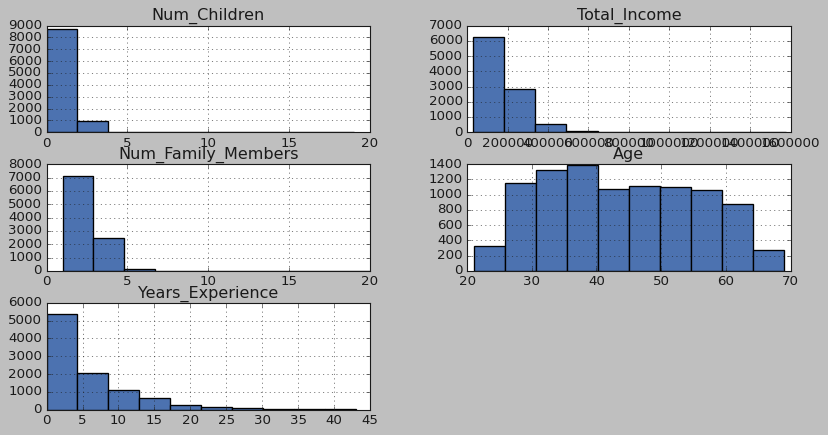

In [55]:
plt.figure(figsize=(10,10))
cols_to_plot = ["Num_Children","Total_Income","Num_Family_Members","Age","Years_Experience"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

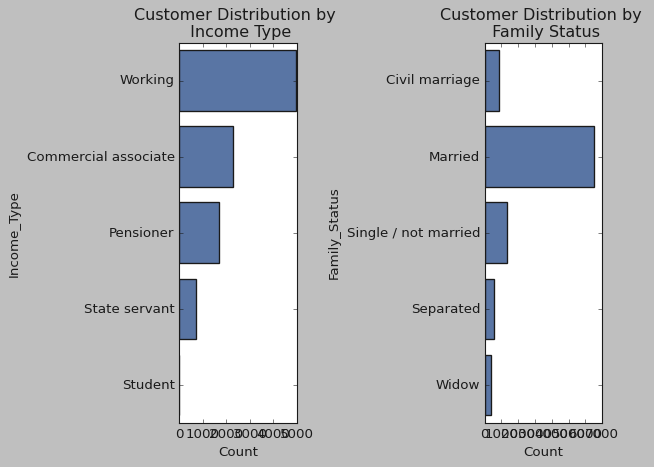

In [56]:
ig, axes = plt.subplots(1,2)

g1 = sns.countplot(y=new_df.Income_Type, linewidth =1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Income Type")
g1.set_xlabel("Count")

g2 = sns.countplot(y=new_df.Family_Status, linewidth =1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

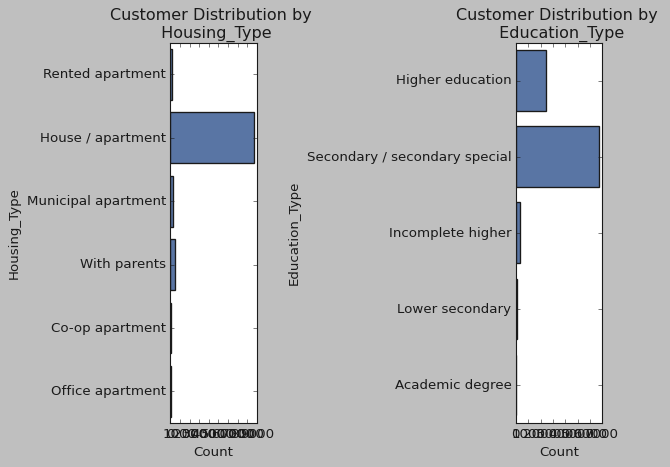

In [57]:
ig, axes = plt.subplots(1,2)

g1 = sns.countplot(y=new_df.Housing_Type, linewidth =1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Housing_Type")
g1.set_xlabel("Count")

g2 = sns.countplot(y=new_df.Education_Type, linewidth =1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Education_Type")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

In [58]:
object_columns = new_df.columns[new_df.dtypes=='object'].tolist()

In [59]:
object_columns

['Gender',
 'Own_Car',
 'Own_Property',
 'Income_Type',
 'Education_Type',
 'Family_Status',
 'Housing_Type',
 'Occupation_Type']

In [60]:
unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                                         columns=['Column_Name',"No_Unique"]).sort_values(by=['No_Unique'])
unique_counts

,Column_Name,No_Unique
0,Gender,2
1,Own_Car,2
2,Own_Property,2
3,Income_Type,5
4,Education_Type,5
5,Family_Status,5
6,Housing_Type,6
7,Occupation_Type,19


In [61]:
for i in new_df.columns[(new_df.dtypes=='object').values].tolist():
    print(i, '\n')
    print(new_df[i].value_counts())
    print("************************"*5)

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
************************************************************************************************************************
Own_Car 

Own_Car
N    6139
Y    3570
Name: count, dtype: int64
************************************************************************************************************************
Own_Property 

Own_Property
Y    6520
N    3189
Name: count, dtype: int64
************************************************************************************************************************
Income_Type 

Income_Type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
************************************************************************************************************************
Education_Type 

Education_Type
Secondary / secondary special    6761
Higher education                 2457
Incomplete 

In [62]:
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Work_Phone', 'Phone', 'Email', 'Occupation_Type',
       'Num_Family_Members', 'Target', 'Age', 'Unemployed',
       'Years_Experience'],
      dtype='object')

In [63]:
# Encode binary features
new_df['Gender'] = new_df['Gender'].replace(['F','M'], [0,1])
new_df['Own_Car'] = new_df['Own_Car'].replace(['Y','N'], [1,0])
new_df['Own_Property'] = new_df['Own_Property'].replace(['Y','N'], [1,0])

In [64]:
new_df.head()

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Work_Phone,Phone,Email,Occupation_Type,Num_Family_Members,Target,Age,Unemployed,Years_Experience
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0


In [65]:
new_df = pd.get_dummies(new_df, columns=['Income_Type','Education_Type',
                                         'Family_Status',
                                         'Housing_Type','Occupation_Type'], drop_first=True)

In [66]:
new_df

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Work_Phone,Phone,Email,Num_Family_Members,...,Occupation_Type_Low-skill Laborers,Occupation_Type_Managers,Occupation_Type_Medicine staff,Occupation_Type_Other,Occupation_Type_Private service staff,Occupation_Type_Realty agents,Occupation_Type_Sales staff,Occupation_Type_Secretaries,Occupation_Type_Security staff,Occupation_Type_Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,1,0,0,2.0,...,False,False,False,True,False,False,False,False,False,False
1,5008806,1,1,1,0,112500.0,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
2,5008808,0,0,1,0,270000.0,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False
3,5008812,0,0,1,0,283500.0,0,0,0,1.0,...,False,False,False,True,False,False,False,False,False,False
4,5008815,1,1,1,0,270000.0,1,1,1,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
9705,5149055,0,0,1,0,112500.0,1,1,0,2.0,...,False,False,False,True,False,False,False,False,False,False
9706,5149729,1,1,1,0,90000.0,0,0,0,2.0,...,False,False,False,True,False,False,False,False,False,False
9707,5149838,0,0,1,0,157500.0,0,1,1,2.0,...,False,False,True,False,False,False,False,False,False,False


In [67]:
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Work_Phone', 'Phone', 'Email', 'Num_Family_Members',
       'Target', 'Age', 'Unemployed', 'Years_Experience',
       'Income_Type_Pensioner', 'Income_Type_State servant',
       'Income_Type_Student', 'Income_Type_Working',
       'Education_Type_Higher education', 'Education_Type_Incomplete higher',
       'Education_Type_Lower secondary',
       'Education_Type_Secondary / secondary special', 'Family_Status_Married',
       'Family_Status_Separated', 'Family_Status_Single / not married',
       'Family_Status_Widow', 'Housing_Type_House / apartment',
       'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment',
       'Housing_Type_Rented apartment', 'Housing_Type_With parents',
       'Occupation_Type_Cleaning staff', 'Occupation_Type_Cooking staff',
       'Occupation_Type_Core staff', 'Occupation_Type_Drivers',
       'Occupation_Type_HR staff', 'Occupation_Type_High skill tech

In [68]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5008804.0,5036955.0,5069449.0,5112986.0,5150479.0
Gender,9709.0,3.487486e-01,0.476599,0.0,0.0,0.0,1.0,1.0
Own_Car,9709.0,3.677001e-01,0.482204,0.0,0.0,0.0,1.0,1.0
Own_Property,9709.0,6.715419e-01,0.469677,0.0,0.0,1.0,1.0,1.0
Num_Children,9709.0,4.228036e-01,0.767019,0.0,0.0,0.0,1.0,19.0
Total_Income,9709.0,1.812282e+05,99277.305097,27000.0,112500.0,157500.0,225000.0,1575000.0
Work_Phone,9709.0,2.174271e-01,0.412517,0.0,0.0,0.0,0.0,1.0
Phone,9709.0,2.876712e-01,0.452700,0.0,0.0,0.0,1.0,1.0
Email,9709.0,8.754764e-02,0.282650,0.0,0.0,0.0,0.0,1.0
Num_Family_Members,9709.0,2.182614e+00,0.932918,1.0,2.0,2.0,3.0,20.0


In [69]:
X = new_df.drop(['ID','Target','Phone','Email'], axis=1)
Y = new_df['Target']

In [70]:
X

,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Work_Phone,Num_Family_Members,Age,Unemployed,Years_Experience,...,Occupation_Type_Low-skill Laborers,Occupation_Type_Managers,Occupation_Type_Medicine staff,Occupation_Type_Other,Occupation_Type_Private service staff,Occupation_Type_Realty agents,Occupation_Type_Sales staff,Occupation_Type_Secretaries,Occupation_Type_Security staff,Occupation_Type_Waiters/barmen staff
0,1,1,1,0,427500.0,1,2.0,33.0,0,12.0,...,False,False,False,True,False,False,False,False,False,False
1,1,1,1,0,112500.0,0,2.0,59.0,0,3.0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0,270000.0,0,1.0,52.0,0,8.0,...,False,False,False,False,False,False,True,False,False,False
3,0,0,1,0,283500.0,0,1.0,62.0,1,0.0,...,False,False,False,True,False,False,False,False,False,False
4,1,1,1,0,270000.0,1,2.0,46.0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,180000.0,0,2.0,56.0,0,1.0,...,False,False,False,False,False,False,False,False,False,False
9705,0,0,1,0,112500.0,1,2.0,43.0,0,7.0,...,False,False,False,True,False,False,False,False,False,False
9706,1,1,1,0,90000.0,0,2.0,52.0,0,5.0,...,False,False,False,True,False,False,False,False,False,False
9707,0,0,1,0,157500.0,0,2.0,34.0,0,4.0,...,False,False,True,False,False,False,False,False,False,False


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.366527,1.311338,0.699364,-0.551258,2.480773,1.897167,-0.195755,-0.929141,-0.460061,0.994638,...,-0.074087,-0.295972,-0.175779,1.497604,-0.094535,-0.040629,-0.331059,-0.068996,-0.138216,-0.064319
1,1.366527,1.311338,0.699364,-0.551258,-0.692321,-0.527102,-0.195755,1.304042,-0.460061,-0.421797,...,-0.074087,-0.295972,-0.175779,-0.667733,-0.094535,-0.040629,-0.331059,-0.068996,7.235064,-0.064319
2,-0.731782,-0.762580,0.699364,-0.551258,0.894226,-0.527102,-1.267716,0.702801,-0.460061,0.365111,...,-0.074087,-0.295972,-0.175779,-0.667733,-0.094535,-0.040629,3.020610,-0.068996,-0.138216,-0.064319
3,-0.731782,-0.762580,0.699364,-0.551258,1.030216,-0.527102,-1.267716,1.561717,2.173625,-0.893942,...,-0.074087,-0.295972,-0.175779,1.497604,-0.094535,-0.040629,-0.331059,-0.068996,-0.138216,-0.064319
4,1.366527,1.311338,0.699364,-0.551258,0.894226,1.897167,-0.195755,0.187451,-0.460061,-0.579179,...,-0.074087,-0.295972,-0.175779,-0.667733,-0.094535,-0.040629,-0.331059,-0.068996,-0.138216,-0.064319


# SMOTE

In [72]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101, stratify=Y)

print(f"Original Training Target Stats: {Counter(y_train)}")
print(f"Original Test Target Stats: {Counter(y_test)}")

sm = SMOTE(random_state=101)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

print(f"Resampled Training Target Stats: {Counter(y_train_sm)}")

Original Training Target Stats: Counter({0: 6319, 1: 962})
Original Test Target Stats: Counter({0: 2107, 1: 321})
Resampled Training Target Stats: Counter({1: 6319, 0: 6319})


In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [74]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [75]:
from sklearn.metrics import classification_report, accuracy_score

In [76]:
print(classification_report(y_train, y_pred_train_xgb))
print("**************"*10)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6319
           1       1.00      0.33      0.50       962

    accuracy                           0.91      7281
   macro avg       0.95      0.67      0.73      7281
weighted avg       0.92      0.91      0.89      7281

********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2107
           1       0.30      0.03      0.05       321

    accuracy                           0.86      2428
   macro avg       0.58      0.51      0.49      2428
weighted avg       0.79      0.86      0.81      2428



In [77]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print("**************"*10)
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))

Training Accuracy 0.911687954951243
********************************************************************************************************************************************
Test Accuracy 0.8628500823723229


# K-Fold method

In [78]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(xgb, x_train, y_train, cv=10)
test = cross_val_score(xgb, x_test, y_test, cv=10)
print("Training Accuracy", training.mean())
print("*****************"*10)
print("Test Accuracy", test.mean())

Training Accuracy 0.8614201299386485
**************************************************************************************************************************************************************************
Test Accuracy 0.8509080706050403


In [79]:
training

array([0.86145405, 0.85851648, 0.85714286, 0.85989011, 0.86126374,
       0.86263736, 0.86126374, 0.86401099, 0.86538462, 0.86263736])

In [80]:
test

array([0.85596708, 0.85185185, 0.8436214 , 0.83127572, 0.8436214 ,
       0.8600823 , 0.85185185, 0.86419753, 0.85950413, 0.84710744])

# Create ML Pipeline

training Logistic Regression...
--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2107
           1       0.14      0.10      0.12       321

    accuracy                           0.80      2428
   macro avg       0.50      0.50      0.50      2428
weighted avg       0.77      0.80      0.79      2428

ROC-AUC Score: 0.5050


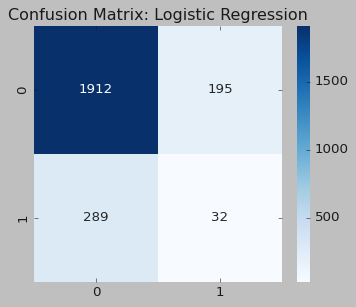



training Random Forest...
--- Random Forest Results ---
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2107
           1       0.19      0.05      0.08       321

    accuracy                           0.85      2428
   macro avg       0.53      0.51      0.50      2428
weighted avg       0.78      0.85      0.81      2428

ROC-AUC Score: 0.5173


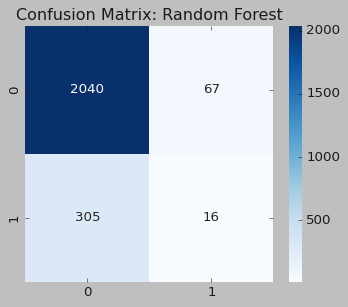



training XGBoost...
--- XGBoost Results ---
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2107
           1       0.34      0.07      0.11       321

    accuracy                           0.86      2428
   macro avg       0.61      0.52      0.52      2428
weighted avg       0.80      0.86      0.82      2428

ROC-AUC Score: 0.5314


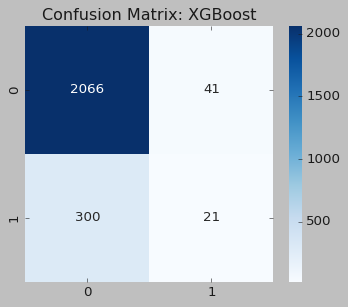

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=101),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"training {name}...")
    model.fit(x_train_sm, y_train_sm)
    
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]
    
    print(f"--- {name} Results ---")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
    print("\n")

# feature importance

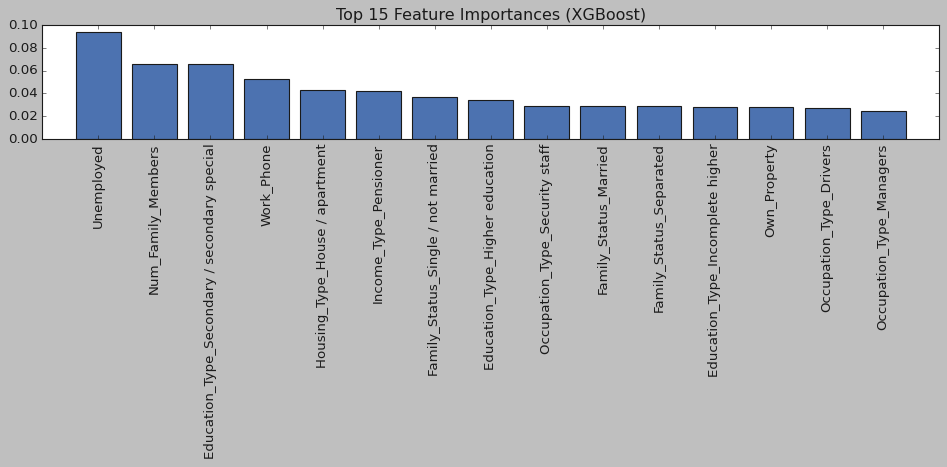

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = new_df.drop(['ID', 'Target', 'Phone', 'Email'], axis=1).columns

importances = models['XGBoost'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Top 15 Feature Importances (XGBoost)")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), feature_names[indices[:15]], rotation=90)
plt.xlim([-1, 15])
plt.tight_layout()
plt.show()

# Save Best Model

In [84]:
import joblib
joblib.dump(models['XGBoost'], 'credit_scoring_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


# Deployment

In [85]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

try:
    model = joblib.load('credit_scoring_model.pkl')
    scaler = joblib.load('scaler.pkl')
except FileNotFoundError:
    print("Error: Model or Scaler file not found. Please train and save them first.")
    exit()

# Define the feature columns
EXPECTED_COLUMNS = [
    'Gender', 'Own_Car', 'Own_Property', 'Num_Children', 'Total_Income', 
    'Work_Phone', 'Num_Family_Members', 'Age', 
    'Unemployed', 'Years_Experience',
    'Income_Type_Pensioner', 'Income_Type_State servant', 'Income_Type_Student', 'Income_Type_Working',
    'Education_Type_Higher education', 'Education_Type_Incomplete higher', 'Education_Type_Lower secondary', 'Education_Type_Secondary / secondary special',
    'Family_Status_Married', 'Family_Status_Separated', 'Family_Status_Single / not married', 'Family_Status_Widow',
    'Housing_Type_House / apartment', 'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment', 'Housing_Type_Rented apartment', 'Housing_Type_With parents',
    'Occupation_Type_Cleaning staff', 'Occupation_Type_Cooking staff', 'Occupation_Type_Core staff', 'Occupation_Type_Drivers', 
    'Occupation_Type_HR staff', 'Occupation_Type_High skill tech staff', 'Occupation_Type_IT staff', 'Occupation_Type_Laborers', 
    'Occupation_Type_Low-skill Laborers', 'Occupation_Type_Managers', 'Occupation_Type_Medicine staff', 'Occupation_Type_Other', 
    'Occupation_Type_Private service staff', 'Occupation_Type_Realty agents', 'Occupation_Type_Sales staff', 'Occupation_Type_Secretaries', 
    'Occupation_Type_Security staff', 'Occupation_Type_Waiters/barmen staff'
]

def predict_approval(gender, own_car, own_property, num_children, total_income, 
                     work_phone, num_family_members, age, 
                     years_experience, income_type, education_type, family_status, 
                     housing_type, occupation_type):
    
    
    input_data = {col: 0 for col in EXPECTED_COLUMNS}
    
    # Map Binary Inputs
    input_data['Gender'] = 1 if gender == "Male" else 0
    input_data['Own_Car'] = 1 if own_car == "Yes" else 0
    input_data['Own_Property'] = 1 if own_property == "Yes" else 0
    input_data['Work_Phone'] = 1 if work_phone else 0
    
    # Map Numeric Inputs
    input_data['Num_Children'] = num_children
    input_data['Total_Income'] = total_income
    input_data['Num_Family_Members'] = num_family_members
    input_data['Age'] = age
    input_data['Years_Experience'] = years_experience
    
    input_data['Unemployed'] = 1 if years_experience == 0 else 0
    
    if f'Income_Type_{income_type}' in input_data:
        input_data[f'Income_Type_{income_type}'] = 1
        
    if f'Education_Type_{education_type}' in input_data:
        input_data[f'Education_Type_{education_type}'] = 1
        
    if f'Family_Status_{family_status}' in input_data:
        input_data[f'Family_Status_{family_status}'] = 1
        
    if f'Housing_Type_{housing_type}' in input_data:
        input_data[f'Housing_Type_{housing_type}'] = 1
        
    if f'Occupation_Type_{occupation_type}' in input_data:
        input_data[f'Occupation_Type_{occupation_type}'] = 1

    # Convert to DataFrame and scale
    features_df = pd.DataFrame([input_data])
    
    features_df = features_df[EXPECTED_COLUMNS]
    
    scaled_features = scaler.transform(features_df)

    # Prediction 
    prediction = model.predict(scaled_features)[0]
    probability = model.predict_proba(scaled_features)[0][1]

    result_text = "Credit Card Approved" if prediction == 0 else "Credit Card Rejected"
    
    if prediction == 0:
        return result_text, f"Low Risk: {(probability*100):.2f}% probability of default."
    else:
        return result_text, f"High Risk: {(probability*100):.2f}% probability of default."

# Define Input Components
inputs = [
    gr.Radio(["Male", "Female"], label="Gender"),
    gr.Radio(["Yes", "No"], label="Owns a Car?"),
    gr.Radio(["Yes", "No"], label="Owns Property?"),
    gr.Number(label="Number of Children", value=0),
    gr.Number(label="Total Annual Income", value=50000),
    gr.Checkbox(label="Has Work Phone"),
    gr.Number(label="Family Members Count", value=1),
    gr.Slider(18, 100, label="Age", value=30),
    gr.Number(label="Years of Experience", value=5),
    
    # Dropdowns for Categorical Features
    gr.Dropdown(["Working", "Commercial associate", "Pensioner", "State servant", "Student"], label="Income Type"),
    gr.Dropdown(["Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"], label="Education Type"),
    gr.Dropdown(["Married", "Single / not married", "Civil marriage", "Separated", "Widow"], label="Family Status"),
    gr.Dropdown(["House / apartment", "With parents", "Municipal apartment", "Rented apartment", "Office apartment", "Co-op apartment"], label="Housing Type"),
    gr.Dropdown(["Laborers", "Core staff", "Sales staff", "Managers", "Drivers", "High skill tech staff", "Accountants", "Medicine staff", "Cooking staff", "Security staff", "Cleaning staff", "Private service staff", "Low-skill Laborers", "Secretaries", "Waiters/barmen staff", "HR staff", "IT staff", "Realty agents", "Other"], label="Occupation Type"),
]

# Define Output Components
outputs = [
    gr.Textbox(label="Decision"),
    gr.Textbox(label="Risk Analysis")
]

# Create the App
app = gr.Interface(
    fn=predict_approval,
    inputs=inputs,
    outputs=outputs,
    title="Credit Card Approval Prediction System",
    description="Enter applicant details to predict credit card approval status based on machine learning analysis.",
    theme="default"
)

if __name__ == "__main__":
    app.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
